In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as m

from collections import Counter
from sklearn.utils import shuffle
from statistics import mean

import scipy.stats as ss
from scipy.stats import skew, boxcox_normmax, norm, uniform
from scipy.special import boxcox1p

from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import ensemble
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor

ModuleNotFoundError: No module named 'lightgbm'

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [5]:
print(train_data.columns)
print(train_data.head())
print(train_data.describe())
print(train_data.shape, test_data.shape)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train_data.drop("Id", axis = 1, inplace = True)
test_data.drop("Id", axis = 1, inplace = True)

In [7]:
y = train_data["SalePrice"].reset_index(drop = True)
X = train_data.drop("SalePrice", axis = 1)

In [8]:
start_shape_train = train_data.shape
start_shape_test = test_data.shape
start_shape_y = y.shape
print("Shape of train data: {}\nShape of test data: {}"
      "\nShape of y_train: {}".format(start_shape_train, start_shape_test, start_shape_y))

Shape of train data: (1460, 80)
Shape of test data: (1459, 79)
Shape of y_train: (1460,)


In [9]:
full_data = pd.concat([X,test_data]).reset_index(drop=True)
shape_full_data_start = full_data.shape
print("Shape of connect train and test data: {}".format(shape_full_data_start))

Shape of connect train and test data: (2919, 79)


In [10]:
full_data['MSSubClass'] = full_data['MSSubClass'].astype(str)

In [11]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

[Text(0.5, 1.0, 'Correlation Matrix')]

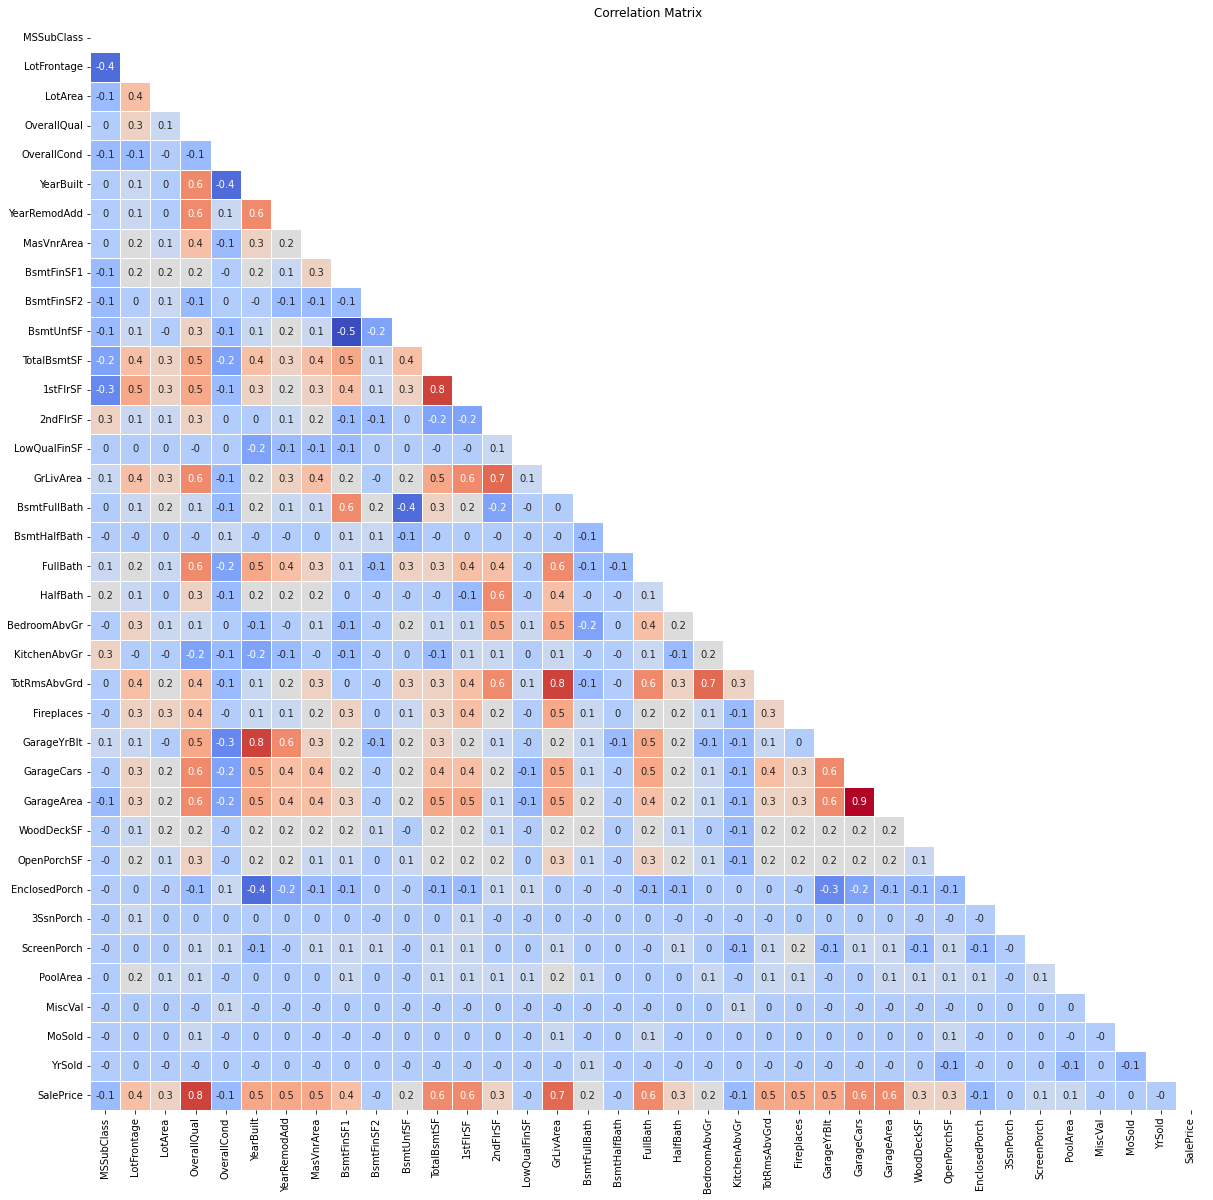

In [14]:
X_corr = train_data.corr()
mask = np.triu(X_corr.corr())
#mask = np.tril(X_corr.corr())
plt.figure(figsize=(20,20))
fig = sns.heatmap(X_corr.round(1), cmap='coolwarm', linewidths=.5, annot=True, cbar = False, mask = mask)
fig.set(title="Correlation Matrix")